# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tarang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv(r'/Users/tarang/JUPYTER LAB/2.env')






True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      )
print(f"Total articles about Bitcoin: {btc_articles['totalResults']}")

# Show sample article
btc_articles["articles"][0]

Total articles about Bitcoin: 7766


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': 'The Rise and Fall of a Bitcoin Mining Sensation',
 'description': 'Compass Mining grew quickly during crypto’s halcyon days. Now, its customers and their thousands of mining machines are stuck.',
 'url': 'https://www.wired.com/story/compass-mining-bitcoin-russia/',
 'urlToImage': 'https://media.wired.com/photos/62e9c5e1d7368105da057de3/191:100/w_1280,c_limit/BitRiver-Mining-Center-Rise-And-Fall-Of-Bitcoin-Mining-Business-1184520941.jpg',
 'publishedAt': '2022-08-03T11:00:00Z',
 'content': "It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He's like, Every machine inside of … [+3472 chars]"}

In [5]:
# Fetch the Ethereum news articles
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")

# Show sample article
ethereum_articles["articles"][0]

Total articles about Ethereum: 4920


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': "Ethereum's 'Merge' Is a Big Deal for Crypto—and the Planet",
 'description': 'One of the most influential cryptocurrency projects is set to finally ditch proof-of-work mining.',
 'url': 'https://www.wired.com/story/ethereum-merge-big-deal-crypto-environment/',
 'urlToImage': 'https://media.wired.com/photos/62fe63bcfd602ff2f11e6fbf/191:100/w_1280,c_limit/Ethereum-Ditches-Crypto-Business-1036181110.jpg',
 'publishedAt': '2022-08-18T16:09:33Z',
 'content': 'Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.000,0.881,0.119
1,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,1.000,0.000
2,You gotta hand it to some people for being imp...,0.5994,0.034,0.835,0.130
3,Cryptocurrencies are often criticized for bein...,-0.5584,0.170,0.763,0.068
4,Elon Musk-owned electric vehicle making compan...,0.2023,0.000,0.947,0.053
...,...,...,...,...,...
95,Aug 2 (Reuters) - A U.S. judge on Tuesday gran...,-0.2960,0.156,0.722,0.122
96,Elon Musk's diamond hands have turned to paper...,0.3400,0.000,0.936,0.064
97,"The deck, dated July 2022, reveals that Babel ...",-0.7845,0.193,0.807,0.000
98,The drop in national TV marketing by the indus...,-0.1027,0.056,0.899,0.045


In [7]:
# Create the Ethereum sentiment scores DataFrame
all_dates = []
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            all_dates.append(date)
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments, all_dates)
    return df

ethereum_sentiment_df = get_sentiment_score(ethereum_articles, 'content')
ethereum_sentiment_df

,content,Compound,Negative,Neutral,Positive
2022-08-18T16:09:33Z,Cryptocurrencies are often criticized for bein...,-0.5584,0.170,0.763,0.068
2022-08-04T15:40:58Z,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.051,0.901,0.048
2022-08-02T17:57:18Z,"It's a day of the week ending in the letter ""y...",-0.2732,0.115,0.827,0.059
2022-07-23T18:19:10Z,"Less than two weeks into its soft launch, Game...",-0.1531,0.045,0.955,0.000
2022-07-25T04:06:00Z,"The Ethereum Merge is significant, and not jus...",0.2023,0.000,0.952,0.048
...,...,...,...,...,...
2022-07-22T19:21:28Z,What happened\r\nCryptocurrency Ethereum Class...,0.0000,0.000,1.000,0.000
2022-08-17T14:12:25Z,The downturn in the crypto market might end up...,0.3182,0.056,0.853,0.091
2022-07-28T18:30:07Z,What happened\r\nIn the latest bullish turn in...,-0.1032,0.075,0.861,0.064
2022-08-04T11:00:00Z,"After a long crypto winter, the price of Ether...",-0.2500,0.054,0.946,0.000


In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.00000,100.000000
mean,0.047574,0.053070,0.88110,0.065810
std,0.455208,0.072859,0.09011,0.071569
min,-0.908100,0.000000,0.62800,0.000000
25%,-0.301550,0.000000,0.82525,0.000000
50%,0.000000,0.000000,0.88500,0.056000
75%,0.362050,0.102250,0.94900,0.110500
max,0.924600,0.307000,1.00000,0.372000


In [10]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.00000
mean,0.138166,0.042580,0.883880,0.07356
std,0.452334,0.067228,0.086231,0.07190
min,-0.936600,0.000000,0.646000,0.00000
25%,-0.038650,0.000000,0.823500,0.00000
50%,0.140550,0.000000,0.892500,0.06100
75%,0.510600,0.057000,0.943750,0.11950
max,0.921600,0.354000,1.000000,0.29900


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tarang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Complete the tokenizer function
def tokenizer(content):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', content)
    words = word_tokenize(re_clean)
    words = word_tokenize(re_clean)
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
   
    return lem




In [72]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.000,0.881,0.119,"[it, wa, in, the, morning, of, june, when, bil..."
1,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,1.000,0.000,"[tool, to, trace, cryptocurrencies, have, over..."
2,You gotta hand it to some people for being imp...,0.5994,0.034,0.835,0.130,"[you, got, ta, hand, it, to, some, people, for..."
3,Cryptocurrencies are often criticized for bein...,-0.5584,0.170,0.763,0.068,"[cryptocurrencies, are, often, criticized, for..."
4,Elon Musk-owned electric vehicle making compan...,0.2023,0.000,0.947,0.053,"[elon, muskowned, electric, vehicle, making, c..."
...,...,...,...,...,...,...
95,Aug 2 (Reuters) - A U.S. judge on Tuesday gran...,-0.2960,0.156,0.722,0.122,"[aug, reuters, a, u, judge, on, tuesday, grant..."
96,Elon Musk's diamond hands have turned to paper...,0.3400,0.000,0.936,0.064,"[elon, musk, diamond, hand, have, turned, to, ..."
97,"The deck, dated July 2022, reveals that Babel ...",-0.7845,0.193,0.807,0.000,"[the, deck, dated, july, reveals, that, babel,..."
98,The drop in national TV marketing by the indus...,-0.1027,0.056,0.899,0.045,"[the, drop, in, national, tv, marketing, by, t..."


In [74]:
# Create a new tokens column for Ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df['content'].apply(tokenizer)

ethereum_sentiment_df.head()

,content,Compound,Negative,Neutral,Positive,tokens
2022-08-18T16:09:33Z,Cryptocurrencies are often criticized for bein...,-0.5584,0.170,0.763,0.068,"[cryptocurrencies, are, often, criticized, for..."
2022-08-04T15:40:58Z,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.051,0.901,0.048,"[the, nonfungible, token, nft, market, ha, fal..."
2022-08-02T17:57:18Z,"It's a day of the week ending in the letter ""y...",-0.2732,0.115,0.827,0.059,"[it, a, day, of, the, week, ending, in, the, l..."
2022-07-23T18:19:10Z,"Less than two weeks into its soft launch, Game...",-0.1531,0.045,0.955,0.000,"[le, than, two, week, into, it, soft, launch, ..."
2022-07-25T04:06:00Z,"The Ethereum Merge is significant, and not jus...",0.2023,0.000,0.952,0.048,"[the, ethereum, merge, is, significant, and, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [75]:
from collections import Counter
from nltk import ngrams

In [80]:
# Generate the Bitcoin N-grams where N=2
big_string_1 = btc_sentiment_df['content'].str.cat()
processed_1 = tokenizer(big_string_1)
bigrams_1 = Counter(ngrams(processed_1, n=2))


In [101]:
# Generate the Ethereum N-grams where N=2
# Generate the Ethereum N-grams where N=2
big_string_2 = ethereum_sentiment_df['content'].str.cat()
processed_2 = tokenizer(big_string_2)
bigrams_2 = Counter(ngrams(processed_2, n=2))

In [102]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [103]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(bigrams_1, 10)

top_10_btc

[(('in', 'the'), 21),
 (('of', 'the'), 17),
 (('of', 'it'), 10),
 (('it', 'bitcoin'), 10),
 (('aug', 'reuters'), 10),
 (('for', 'the'), 9),
 (('to', 'the'), 8),
 (('according', 'to'), 7),
 (('in', 'a'), 7),
 (('charsjuly', 'reuters'), 7)]

In [104]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(bigrams_2, 10)

top_10_eth

[(('of', 'the'), 17),
 (('in', 'the'), 14),
 (('on', 'the'), 11),
 (('to', 'the'), 9),
 (('the', 'crypto'), 9),
 (('the', 'ethereum'), 6),
 (('to', 'be'), 6),
 (('the', 'most'), 6),
 (('to', 'a'), 6),
 (('aug', 'reuters'), 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

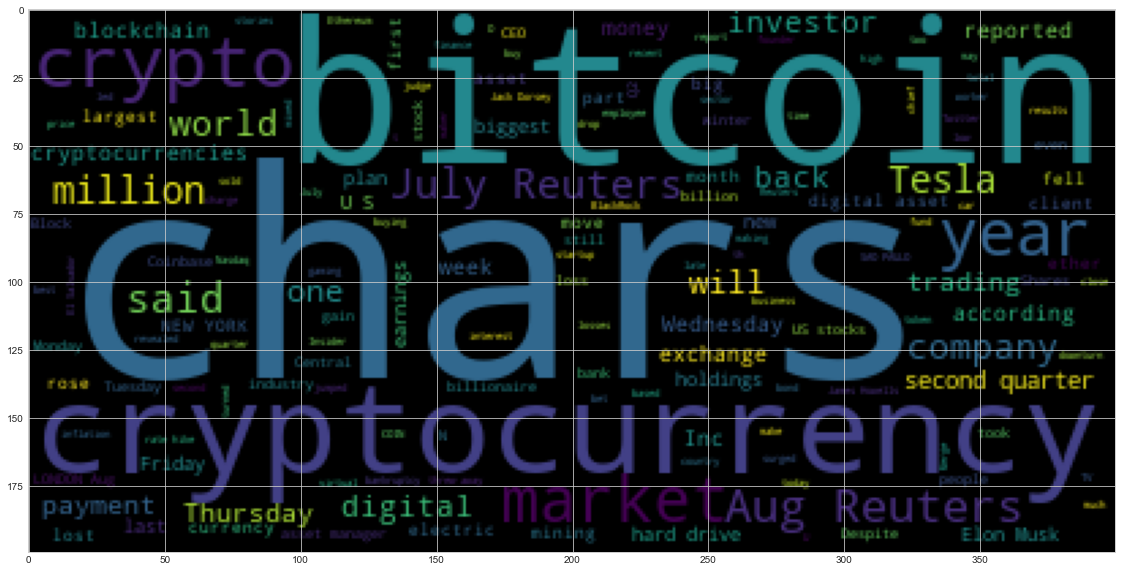

In [106]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string_1)
plt.imshow(wc_btc)

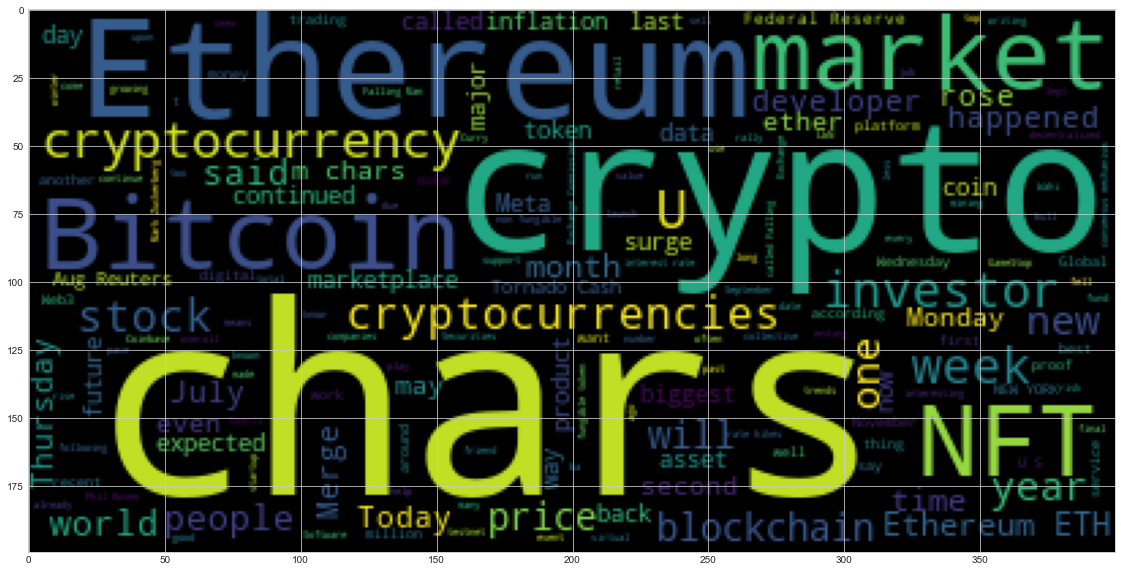

In [107]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string_2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [108]:
import spacy
from spacy import displacy

In [109]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [110]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [111]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string_1)

In [112]:
# Run the NER processor on all of the text
doc_1 = nlp(bitcoin_text)

# Add a title to the document
doc_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [113]:
# Render the visualization
displacy.render(doc_1, style='ent')


In [114]:
# List all Entities
for ent in doc_1.ents:
    print(ent.text)

8:45 in the morning of June 13
Bill Stewart
Maine
Dynamics Mining
the last several years
millions
UK
mans
Every year
Belgium
the University of Cambridges Bitcoin Electricity Consump
Musk
Tesla
Bitcoin
Q2
chars]July 27
Reuters
6.85%
22,717.05
22:05
GMT
Wednesday
1,457.27
29.1%
the weeks
Krist
2021
Tesla
$936 million
the second quarter of 2022
Bitcoin
75
24,000
first
August
US
this week
as much as 4%
24,191
Aug 19
Reuters
Friday
three-week
2
Reuters
a good month
months
more than 17%
July
October
chars]July 30
Reuters
3.36%
24,584.24
GMT
Saturday
798.93
39.7%
the year
2022
Wednesday
$2.3 billion
second-quarter
a record $3.3 billion
first
11
Reuters
the United States
chars]July 19
Reuters
months
chars]NEW YORK
July 20
Reuters
Wednesday
Tesla Inc
TSLA.O
about 75%
fiat
ten
Wednesday
approximately 75%
chars]July 29
Reuters
Bitcoin Valley
Honduran
Santa Lucia
one
Today
+8199 chars]El Salvador
Tuesday
$1.6 billion
Central America
la
Michael Saylor
quarterly
more than $900 million
the last month

---

### Ethereum NER

In [115]:
# Concatenate all of the Ethereum text together
ethereum_text = (big_string_2)

In [116]:
# Run the NER processor on all of the text
doc_2 = nlp(ethereum_text)

# Add a title to the document
doc_2.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [117]:
# Render the visualization
displacy.render(doc_2, style='ent')

In [118]:
# List all Entities
for ent in doc_2.ents:
    print(ent.text)

Every year
Belgium
the University of Cambridges Bitcoin Electricity Consump
NFT
Instagram
May
NF
a day of the week ending
The Securities and Exchange Commission
11
two weeks
GameStops
Falling Man
chars]The Ethereum Merge
2014
Merge
second
Ethereum
Vitalik Buterin
Thursday
the Ethereum Community Conference
Paris
8
Reuters
Ethereum and Bitcoin
this week
Monday
60%
Vivaldi
Jon von Tetzchner
+3393
the last month
Ethereum 2.0
second
chars]The US Treasury Department's
Office of Foreign Asset Control
Monday
Tornado Cash
North Korean
Ameri
as much as 75%
JPMorgan
Monday
36%
102%
mid-June
Europe
one
millions of pounds
Mangnall
November 2021
Joe Hovde
New York
chars]July 30
Reuters
3.36%
24,584.24
GMT
Saturday
798.93
39.7%
the year
chars]July 27
Reuters
6.85%
22,717.05
22:05
GMT
Wednesday
1,457.27
29.1%
Ethereum Merge
next month
Glassnode
Ethereum
chars]LONDON
Aug 11
Reuters
$3.12 trillion
July
13%
monthly
CryptoCompare
Thursday
pri
80%
the past few hours
NIRV
U.S.
8 cents
CoinGecko
Mike Novogra

---